In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


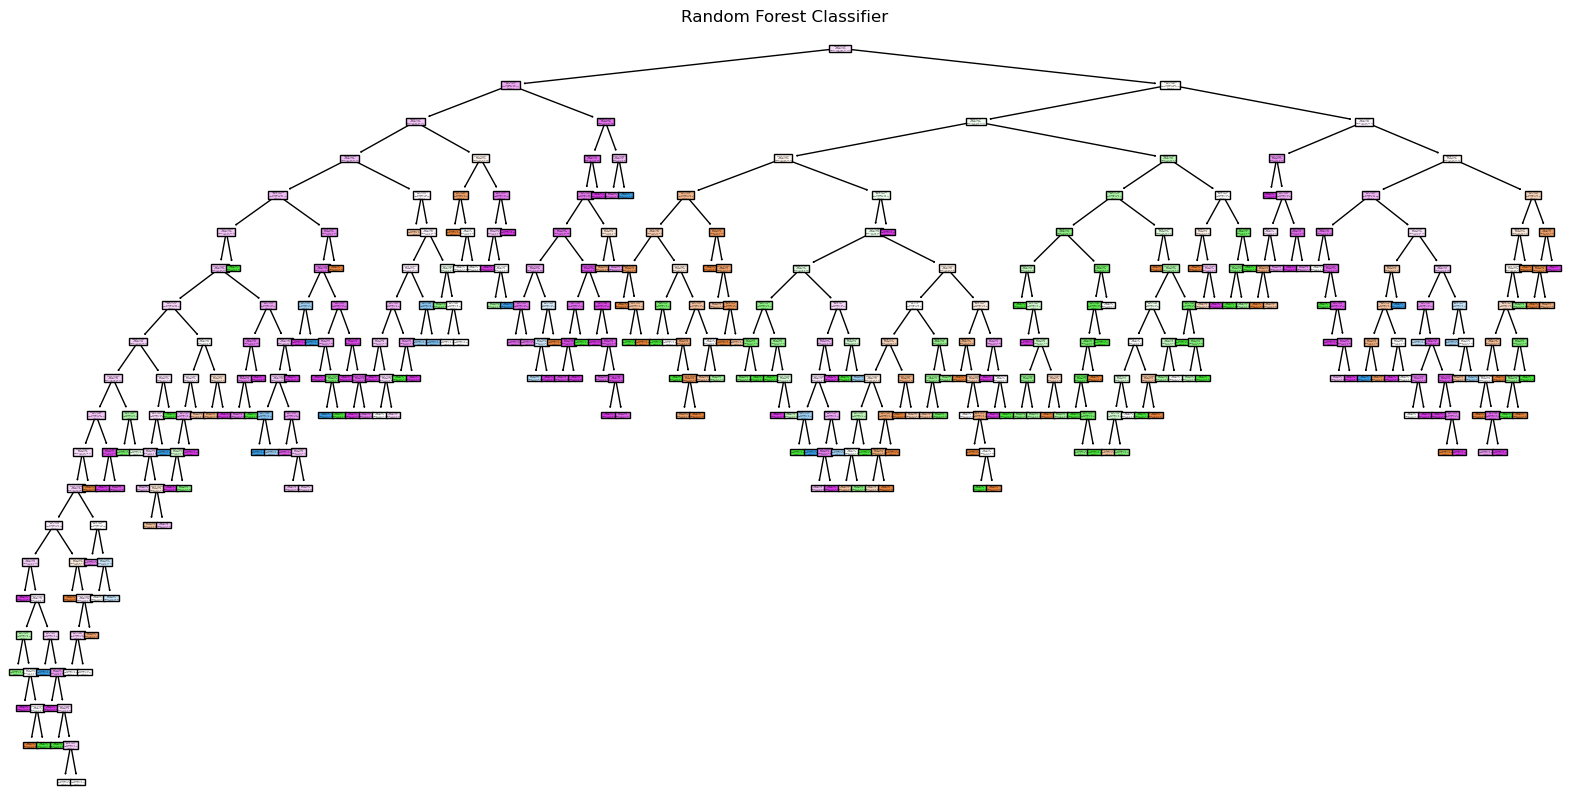

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [0, 1, 2, 3]
data['target_binned'] = pd.cut(data['target'], bins=bins, labels=labels, include_lowest=True)
features = data[['thalach', 'oldpeak']]
target = data['target_binned']
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=['thalach', 'oldpeak'], class_names=encoder.
          classes_.astype(str).tolist())
plt.title('Random Forest Classifier')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L1 Regularization (similar to Lasso)
logistic_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=42)
logistic_l1.fit(X_train, y_train)

# Logistic Regression with L2 Regularization (similar to Ridge)
logistic_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=42)
logistic_l2.fit(X_train, y_train)

# Coefficients
logistic_l1_coefs = logistic_l1.coef_
logistic_l2_coefs = logistic_l2.coef_

# Scores
logistic_l1_score = logistic_l1.score(X_test, y_test)
logistic_l2_score = logistic_l2.score(X_test, y_test)
rf_classifier_score = rf_classifier.score(X_test, y_test)

(logistic_l1_coefs, logistic_l2_coefs, rf_classifier_score, logistic_l1_score, logistic_l2_score)

C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aravind Kaspe\Anaconda 3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[ 4.24040550e-06,  2.27263824e-01],
        [-1.66331724e-03,  3.80646966e-01],
        [-4.83742567e-04, -2.44534477e-01],
        [ 8.19475899e-03, -3.63377031e-01]]),
 array([[-0.01795319,  0.32966853],
        [-0.01214062,  0.55949734],
        [ 0.00850707, -0.6143265 ],
        [ 0.02158674, -0.27483938]]),
 0.5219512195121951,
 0.44878048780487806,
 0.4)

In [16]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

lasso_coefs = lasso.coef_
ridge_coefs = ridge.coef_
lasso_score = lasso.score(X_test, y_test)
ridge_score = ridge.score(X_test, y_test)

print("Lasso Coefficients:", lasso_coefs)
print("Ridge Coefficients:", ridge_coefs)
print("Lasso R^2 Score:", lasso_score)
print("Ridge R^2 Score:", ridge_score)

Lasso Coefficients: [ 0.01789513 -0.20908097]
Ridge Coefficients: [ 0.01656351 -0.29541872]
Lasso R^2 Score: 0.10578428310641508
Ridge R^2 Score: 0.09737504871302283
